## 机器学习通用
机器学习适用前提：假定当前数据集与未来的数据集是同分布的前提下，适用计算机挖掘数据的分布规律，并用于对未知的数据进行定性或定量的计算
- 机器学习目标
    - 回归
    - 分类
    - 迁移
    - 强化
- 机器学习方法
    - Loss function
    - 评价指标

### 决策树
决策树（Decision Tree）是一种非参数的有监督学习方法，它能够从一些列有特征和标签的数据中总结出决策规则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各种问题时都有良好表现，尤其以树模型为核心的各种集成算法，在各个领域有广泛的应用。  
<img src='./01.png'/>
  
决策树在逻辑上以树的形式存在，包含根节点、内部结点和叶节点。 
- 根节点：包含数据集中的所有数据的集合 
- 内部节点：每个内部节点为一个判断条件，并且包含数据集中满足从根节点到该节点所有条件的数据的集合。根据内部结点的判断条件测试结果，内部节点对应的数据的集合别分到两个或多个子节点中。 
- 叶节点：叶节点为最终的类别，被包含在该叶节点的数据属于该类别。

决策树算法的核心问题
- 如何从数据表中找出最佳节点和最佳分支？
    - 定义不纯度，选择对不纯度下降最大的特征和分界进行当前分支节点。
    - 不纯度：基尼系数和信息熵
        - 基于信息熵的方式进行切分
熵：描述属性不确定性的值，越接近于0，其不确定性越小
$$
    H(X) = -\Sigma{p_i}log(p_i)
$$
条件熵：描述在X条件下Y的熵
$$
    H(Y|X) = \Sigma p(x_i)H(Y|X=x_i)
$$
互信息（熵增益）
$$
    I(X,Y) = H(Y) - H(Y|X)
$$
熵增益率
$$
    GainRatio(X -> Y) = \frac{I(X,Y)}{H(Y)}
$$
        - 基于基尼系数的方式进行切分
分类问题中，假设有K个类，样本点属于第k类的概率为$p_k$,则概率分布的基尼指数定义为
$$Gini(p)=\Sigma^{K}_{k=1}p_k(1-p_k)=1-\Sigma^K_{k=1}p^2_k$$
可以看出，对于分类问题，条件分类下的基尼系数越小，则不纯度也越小。
- 如何让决策树停止生长，防止过拟合？  
    - 预剪枝：该策略就是在对一个节点进行划分前进行估计，如果不能提升决策树泛化精度，就停止划分，将当前节点设置为叶节点。那么怎么测量泛化精度，就是留出一部分训练数据当做测试集，每次划分前比较划分前后的测试集预测精度。   
    优点：降低了过拟合风险，降低了训练所需的时间。  
    缺点：预剪枝是一种贪心操作，可能有些划分暂时无法提升精度，但是后续划分可以提升精度。故产生了欠拟合的风险。
    - 后剪枝：该策略是首先正常建立一个决策树，然后对整个决策树进行剪枝。按照决策树的广度优先搜索的反序，依次对内部节点进行剪枝，如果将某以内部节点为根的子树换成一个叶节点，可以提高泛化性能，就进行剪枝。   
    优先：降低过拟合风险，降低欠拟合风险，决策树效果提升比预剪枝强  
    缺点：时间开销大得多


### sklearn中的决策树
name | describe |
-|-|-
tree.DecisionTreeClassifier | 分类树 | 
tree.DecisionTreeRegressor | 回归树 | 
tree.ExtraTreeClassifier | 高随机版本的分类树 | 
tree.ExtraTreeRegressor | 高随机版本的回归树 |

In [2]:
import pandas as pd
df = pd.read_csv('../data/HR.csv')
print(df['department'].value_counts())
print(df['salary'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#预处理数据
def preprocessing(df):
    data = df.dropna()
    data["salary"] = [map_salary(s) for s in data["salary"].values]
    data = data.drop(["department"],axis=1)
    return data
def map_salary(salary):
    d = dict([("low",1),("medium",2),("high",3)])
    return d.get(salary,0)

In [9]:
data = preprocessing(df)
from sklearn.model_selection import train_test_split
Y = data['left']
X = data.drop(['left'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

print(X_train.shape)
print(X_test.shape)

(10498, 8)
(4500, 8)


/Users/roy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
#定义评价函数
def doMetrics(Y_true,Y_predict,clf_name,Y_predict_prob=None):
    from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,roc_curve,auc
    print(clf_name,"precision_score:",precision_score(Y_true,Y_predict))
    print(clf_name,"accuracy score:",accuracy_score(Y_true,Y_predict))
    print(clf_name,"recall score:",recall_score(Y_true,Y_predict))
    print(clf_name,"f1 score:",f1_score(Y_true,Y_predict))
    print(confusion_matrix(Y_true,Y_predict,labels=[0,1]))

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_predict = tree.predict(X_test)
doMetrics(Y_test,Y_predict,"DecisionTreeClassifier")

DecisionTreeClassifier precision_score: 0.956197576887
DecisionTreeClassifier accuracy score: 0.979777777778
DecisionTreeClassifier recall score: 0.958878504673
DecisionTreeClassifier f1 score: 0.957536164256
[[3383   47]
 [  44 1026]]


In [7]:
tree.feature_importances_

array([  5.11660156e-01,   1.48605735e-01,   1.03116282e-01,
         9.54437611e-02,   1.32971555e-01,   7.12190573e-04,
         2.83180129e-05,   7.46200303e-03])

In [15]:
[*zip(list(data.drop(['left'],axis=1)),tree.feature_importances_)]

[('satisfaction_level', 0.51166015554798416),
 ('last_evaluation', 0.14860573459549611),
 ('number_project', 0.10311628212651928),
 ('average_montly_hours', 0.095443761119544723),
 ('time_spend_company', 0.13297155499953775),
 ('Work_accident', 0.00071219057255482259),
 ('promotion_last_5years', 2.8318012875038301e-05),
 ('salary', 0.007462003025487985)]

In [13]:
#对决策树进行画图和输出
def plotTree(clf,clf_name,feature_names):
    import pydotplus
    from sklearn.tree import export_graphviz
    dot_data = export_graphviz(clf,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=["NL","L"],
                               filled=True,
                               rounded=True,
                               special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(clf_name + ".pdf")
    
plotTree(tree,"DecisionTreeClassifier",X_train.columns.values)

#### 决策树参数（https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier）
- criterion
#### 剪枝参数
- max_depth
- min_samples_split
- min_samples_leaf
- max_features
#### 权重参数
- class_weight
- min_weight_fraction_leaf

### 剪枝，决策树的核心

## 调参

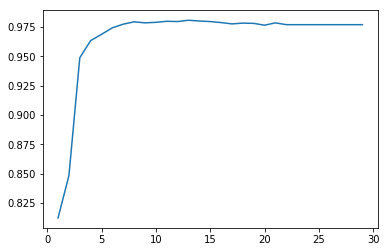

best score:0.9806666666666667
best model index:12


In [14]:
import matplotlib.pyplot as plt
import numpy as np
#学习曲线
depth = range(1,30,1)
scores = []
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i,random_state=0)
    clf = clf.fit(X_train,Y_train)
    scores.append(clf.score(X_test,Y_test))
plt.plot(depth,scores)
plt.show()
print("best score:{}".format(np.max(scores)))
print("best model index:{}".format(scores.index(np.max(scores))))

In [16]:
#网格搜索 --考虑多个参数的综合搜索空间问题
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parms = {'max_depth':range(1,20),'criterion':['gini','entropy'],'min_samples_leaf':range(1,5)}
clf = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(clf,parms,n_jobs=-1,cv=10)
gs.fit(X_train,Y_train)
print(classification_report(Y_test,gs.predict(X_test)))
print("Best: %f using %s" % (gs.best_score_,gs.best_params_))
means = gs.cv_results_['mean_test_score']
params = gs.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3430
          1       0.98      0.93      0.95      1070

avg / total       0.98      0.98      0.98      4500

Best: 0.981044 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
0.824062  with:   {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.824062  with:   {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.824062  with:   {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.824062  with:   {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.850638  with:   {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.850638  with:   {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.850638  with:   {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.850638  with:   {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.954753  with:   {'criterion': 'gini', 'max_depth': 3, 'min_samples_l

### K折交叉验证（K-fold Cross Validation）
同一模型在不同训练集上学得的函数往往不同，那我们怎样才能选出最好的模型和最好的函数呢？可以采用交叉验证（Cross Validation）法，其基本思路如下：将训练集划分为K份，每次采用其中K-1份作为训练集，另外一份作为验证集，在训练集上学得函数后，然后在验证集上计算误差。再次选择另外K-1份数据再次重复上述过程，最终模型的误差为学得的K个函数的误差的平均值，并依据此值选择最佳模型，最后在整个训练集上训练选择的最佳模型，并在测试集上进行测试。 

/Users/roy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.973684210526
[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


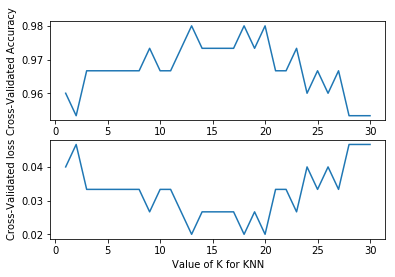

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target


X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5, scoring="accuracy")
print(scores)
print(scores.mean())

k_range = range(1,31)
loss_scores = []
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(accuracy_score.mean())
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    loss_scores.append(loss.mean())

plt.subplot(2,1,1)
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.subplot(2,1,2)
plt.plot(k_range, loss_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated loss')
plt.show()

### 偏差与方差分析
当我们的模型表现不佳时，通常是出现两种问题，一种是 高偏差 问题，另一种是 高方差 问题。识别它们有助于选择正确的优化方式，所以我们先来看下 偏差 与 方差 的意义。 
- 偏差: 描述模型输出结果的期望与样本真实结果的差距。 
- 方差: 描述模型对于给定值的输出稳定性。

<img src=02.jpg/>

对于多项式回归，当次数选取较低时，我们的 训练集误差 和 交叉验证集误差 都会很大；当次数选择刚好时，训练集误差 和 交叉验证集误差 都很小；当次数过大时会产生过拟合，虽然 训练集误差 很小，但 交叉验证集误差 会很大（ 关系图如下 ）。 
<img src=03.jpg/>

所以我们可以计算$J_{train}(\theta)$和$J_{cv}(\theta)$,如果他们同时很大的话，就是遇到了高偏差问题，而$J_{train}(\theta)$比$J_{cv}(\theta)$大很多的话，则是遇到了高方差问题。  

对于正则化参数，使用同样的分析方法，当参数比较小时容易产生过拟合现象，也就是高方差问题。而参数比较大时容易产生欠拟合现象，也就是高偏差问题。

#### 学习曲线

无论你是要检查你的学习算法是否正常工作或是要改进算法的表现，学习曲线都是一个十分直观有效的工具。学习曲线的横轴是样本数，纵轴为训练集和交叉验证集的误差。所以在一开始，由于样本数很少，$J_{train}(\theta)$几乎没有，而$J_{cv}(\theta)$则非常大。随着样本数的增加$J_{train}(\theta)$ 不断增大，而$J_{cv}(\theta)$因为训练数据增加而拟合得更好因此下降。所以 学习曲线看上去如下图

<img src='04.jpg'/>

在高偏差的情形下，$J_{train}(\theta)$与$J_{cv}(\theta)$已经十分接近，但是误差很大。这时候一味地增加样本数并不能给算法的性能带来提升。

<img src='05.jpg'/>

在高方差的情形下，$J_{train}(\theta)$的误差较小，$J_{cv}(\theta)$比较大，这时搜集更多的样本很可能带来帮助

<img src='06.jpg'/>

#### 总结
有了以上的分析手段，就能够得出在何种场景下使用我们的改进策略：
1. [高方差] 采集更多的样本数据
2. [高方差] 减少特征数量，去除非主要的特征
3. [高偏差] 引入更多的相关特征
4. [高偏差] 采用多项式特征
5. [高偏差] 减小正则化参数 λ
6. [高方差] 增加正则化参数 λ

### 欠拟合和过拟合应对策略

欠拟合（刻画不够）

- 寻找更好的特征，提升对数据的刻画能力
- 增加特征数量
- 重新选择更加复杂的模型

过拟合（刻画太细，泛化太差）
- 增加训练样本数量，样本多了，噪声比中就减少了
- 减少特征维数，高维空间密度小
- 加入正则化项，使得模型更加平滑